In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from proj1_helpers import *
from helpers import *
from implementations import *
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
DATA_TRAIN_PATH = 'data/train.csv' 
y, x, ids = load_csv_data(DATA_TRAIN_PATH)

In [3]:
sanitized_x = x.copy()

na_values_x = sanitized_x == -999

print(np.sum(na_values_x))

for i, feature in enumerate(sanitized_x.T):
    na_values = feature == -999
    known_values = ~na_values
    
    mean = np.mean(feature[known_values])
    std = np.std(feature[known_values])
    
    sanitized_x[:, i] = sanitized_x[:, i] - mean
    sanitized_x[:, i] = sanitized_x[:, i] / std
    
    
sanitized_x[na_values_x] = 0
sanitized_x[:,5][:50]

1580052


array([-0.62125844,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.21926102, -0.53665123,  0.        ,  0.        ,  0.        ,
        0.        , -0.29968666,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.01870612,  0.        ,
        0.        ,  0.        ,  1.63325174,  0.        , -0.14063324,
        0.        , -0.19070156,  1.21453303, -0.32085355,  0.        ,
        0.        ,  0.        ,  0.        , -0.24220062, -0.51448357,
        0.        ,  0.        ,  0.27107761,  0.        ,  0.        ,
       -0.73823707,  0.30071075,  0.        ,  0.        ,  0.        ])

In [4]:
print("red: ", y[y==-1].shape[0], "\nblue: ", y[y==1].shape[0])

red:  164333 
blue:  85667


In [13]:
def plot_distr(y00, y01, y10, y11, name, feature):
    fig = plt.figure(figsize=(8,13))
    gs = fig.add_gridspec(2,1)
    
    ax1 = fig.add_subplot(gs[0,0])
    ax1.set_title(f"Before processing", fontsize=12)
    ax1.set_xlabel(f"Value of feature {feature}", fontsize=12)
    ax1.set_ylabel(f"Number of times x appears", fontsize=12)
    ax1.hist(y00, bins=100, color=to_rgba('red', alpha=0.5), label="y == -1")
    ax1.hist(y01, bins=100, color=to_rgba('blue', alpha=0.5), label="y == 1")
    ax1.legend()
    
    ax2 = fig.add_subplot(gs[1,0])
    ax2.set_title(f"After removing -999 values and normalizing", fontsize=12)
    ax2.set_xlabel(f"Value of feature {feature}", fontsize=12)
    ax2.set_ylabel(f"Number of times x appears", fontsize=12)
    ax2.hist(y10, bins=100, color=to_rgba('red', alpha=0.5), label="y == -1")
    ax2.hist(y11, bins=100, color=to_rgba('blue', alpha=0.5), label="y == 1")
    ax2.legend()
    
    plt.show()
    fig.savefig(name)
    print('\n\n\n')

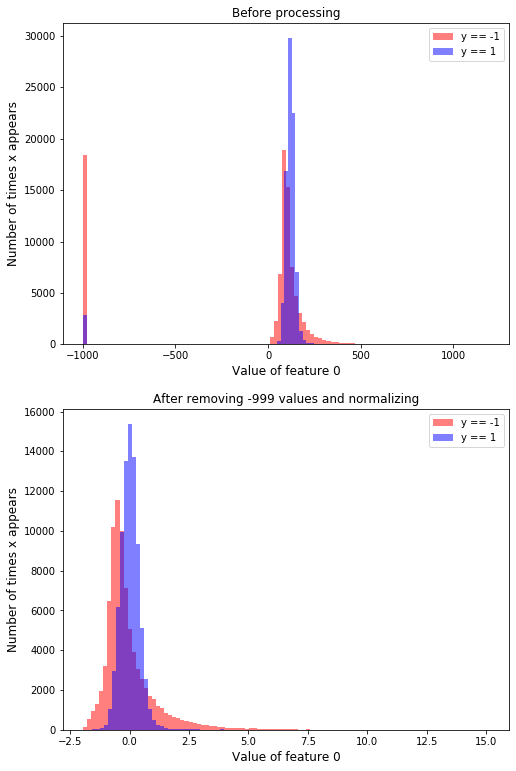

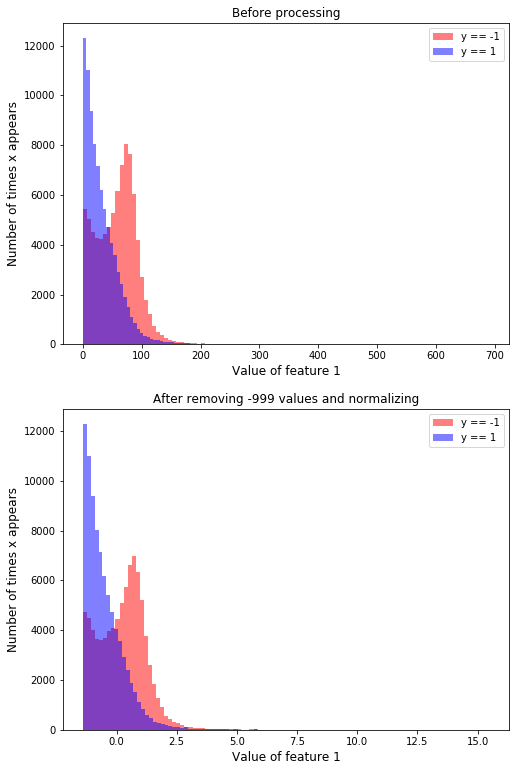

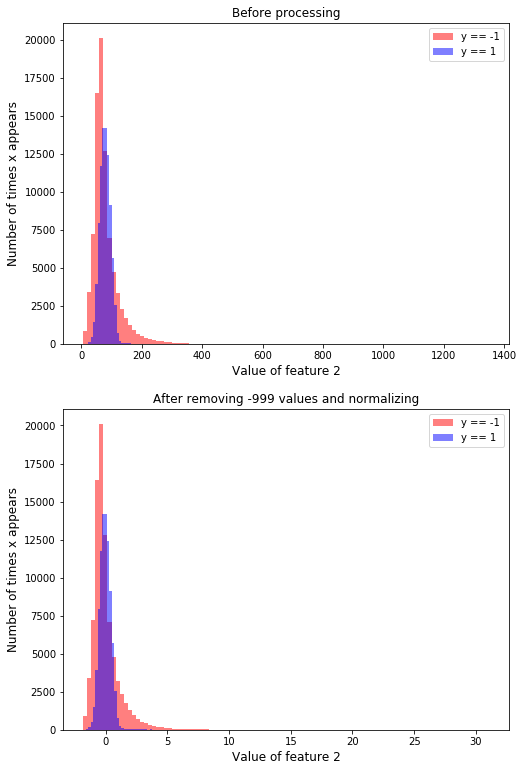

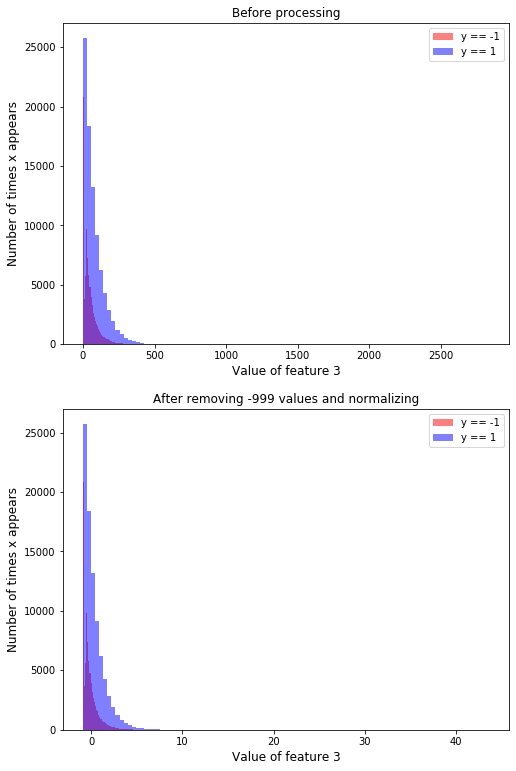

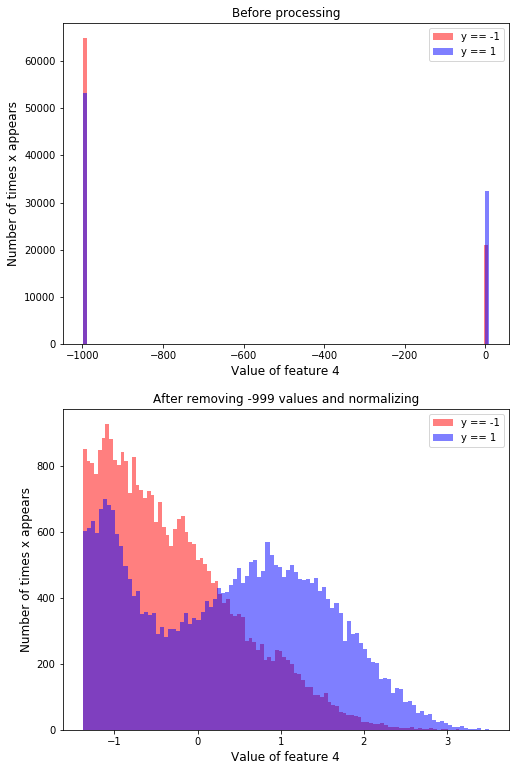

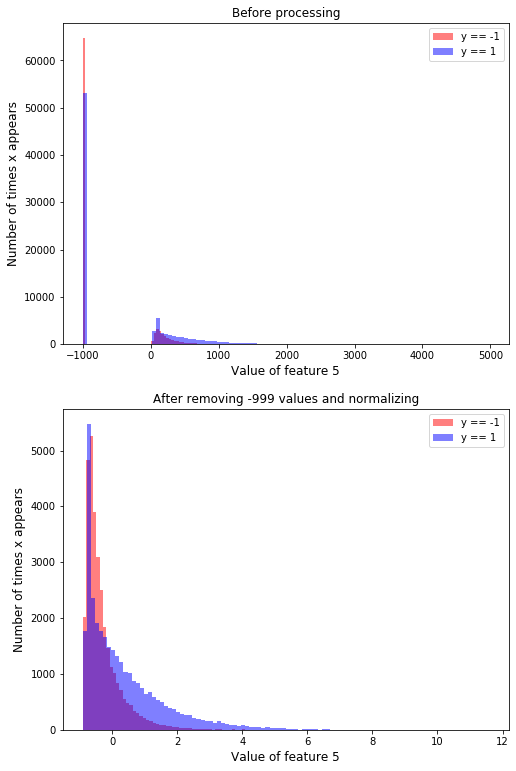

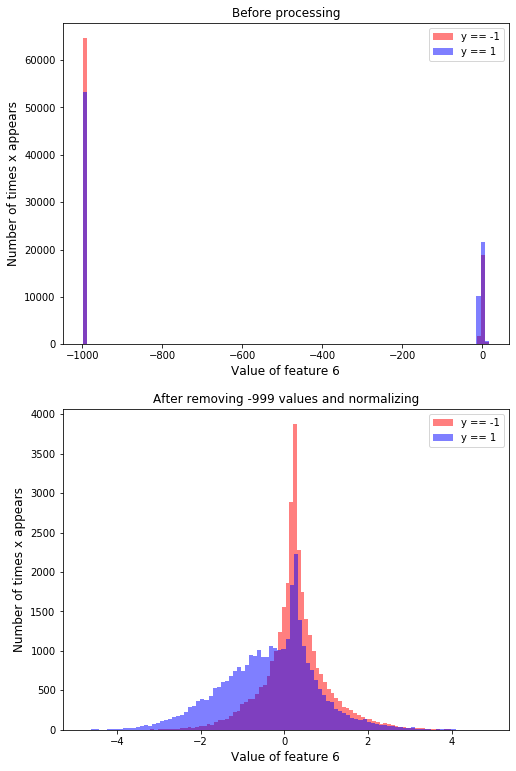

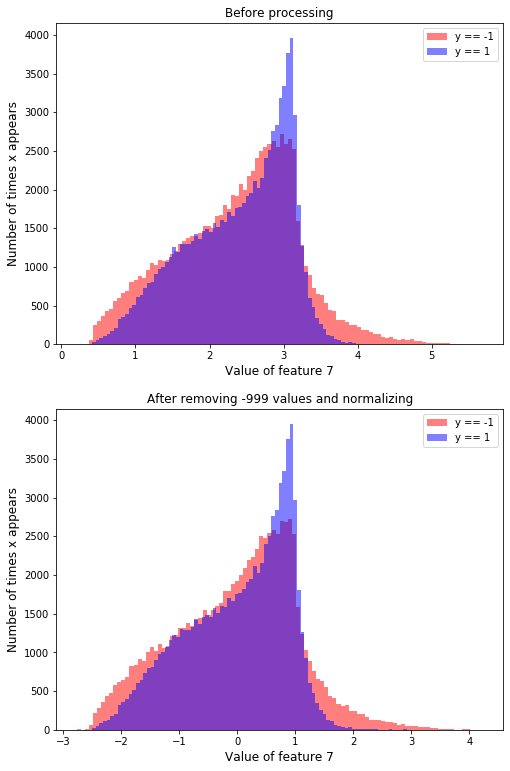

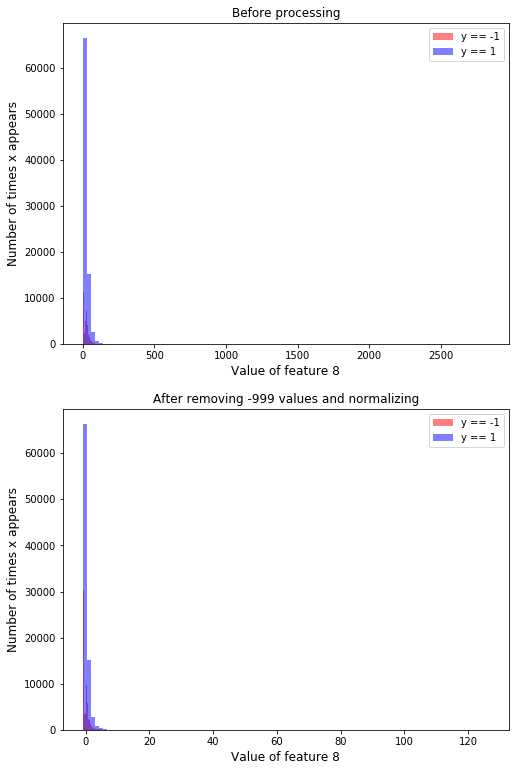

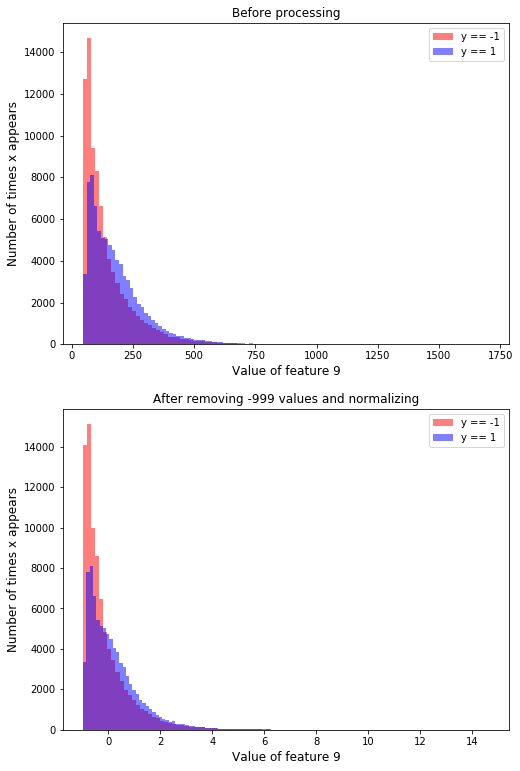

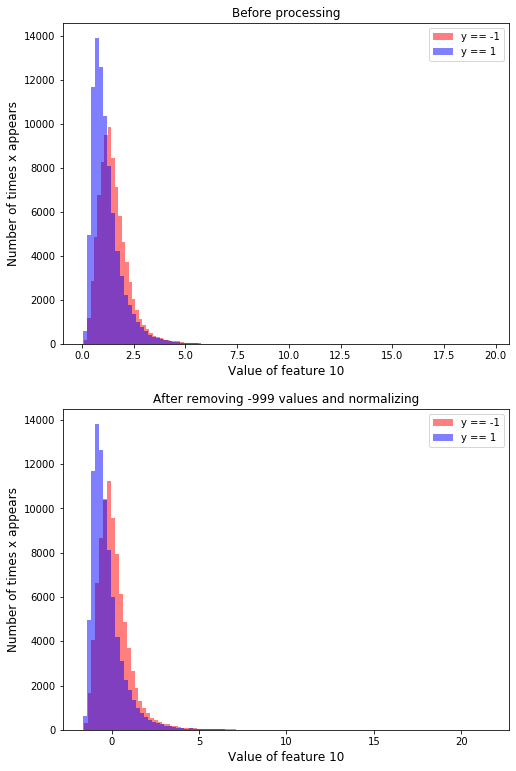

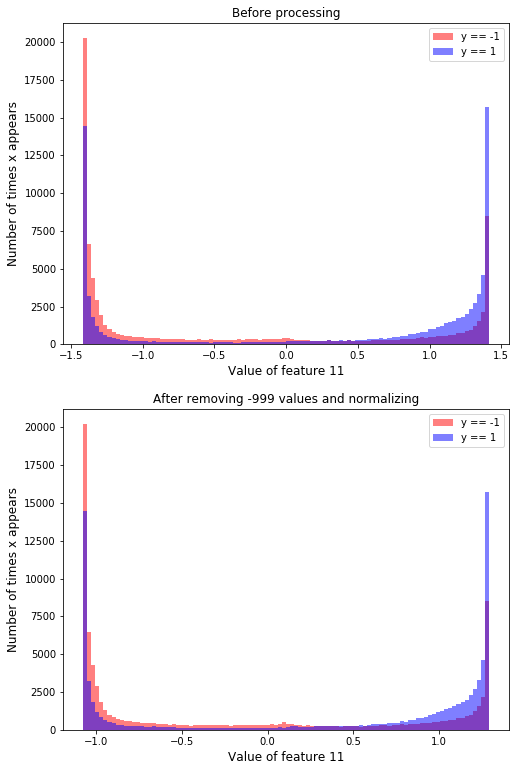

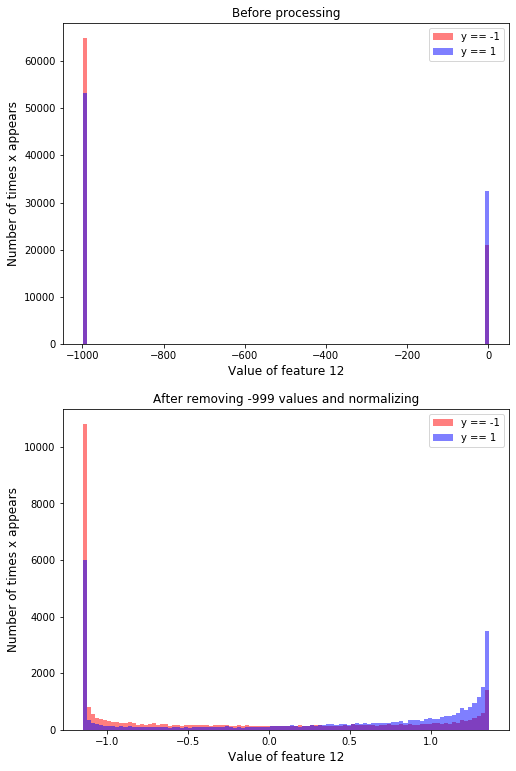

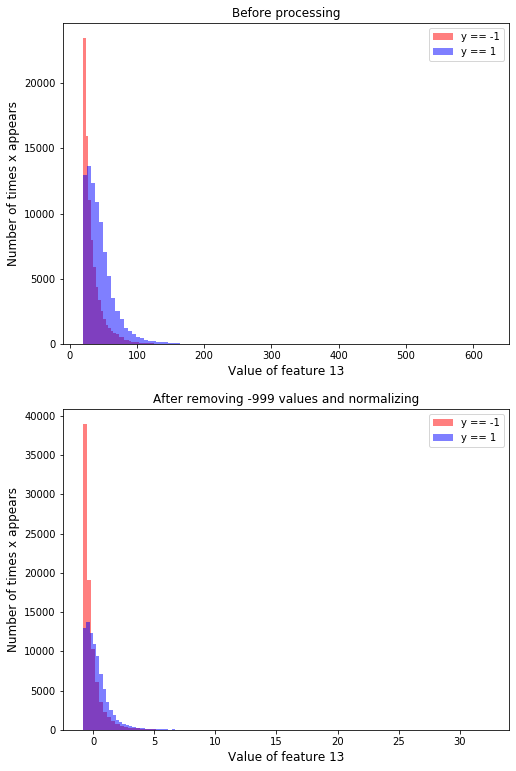

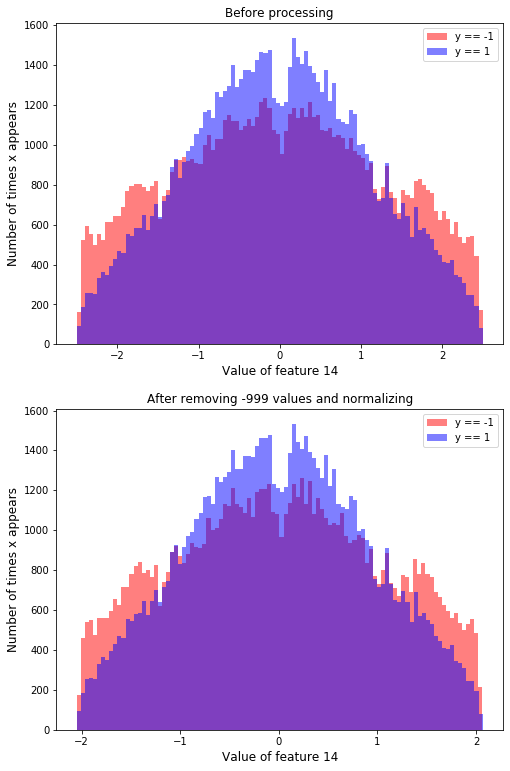

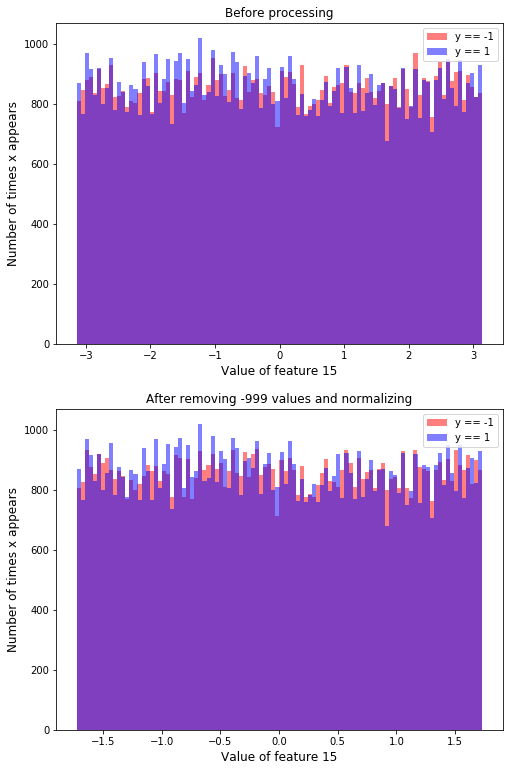

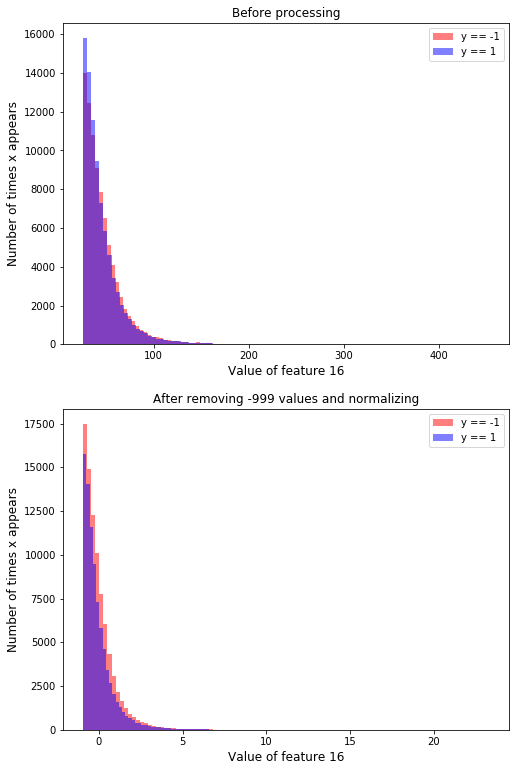

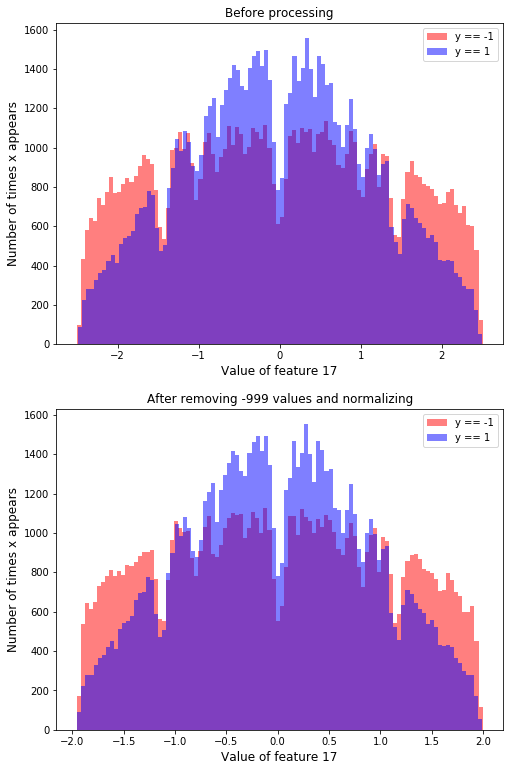

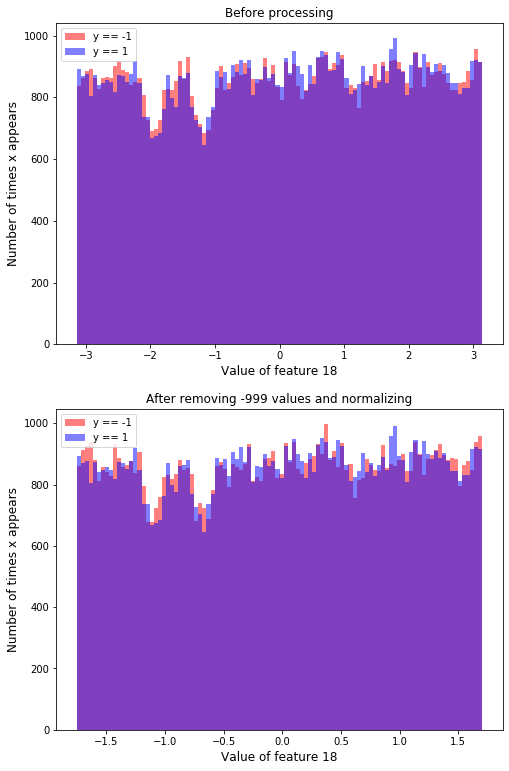

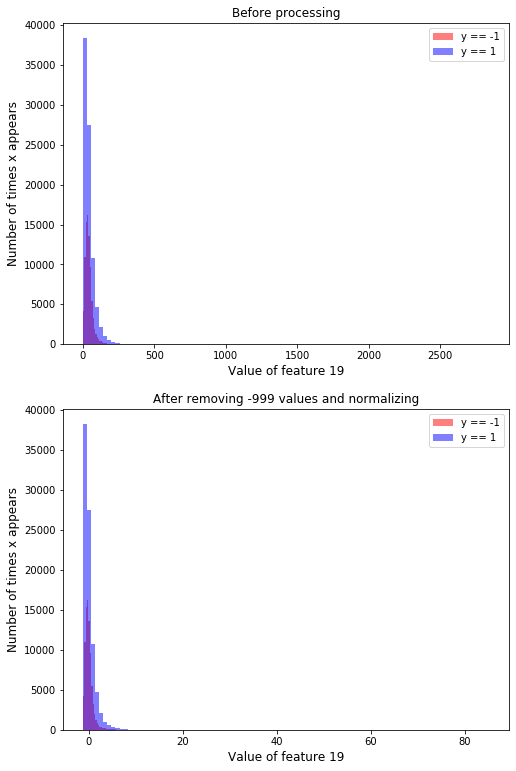

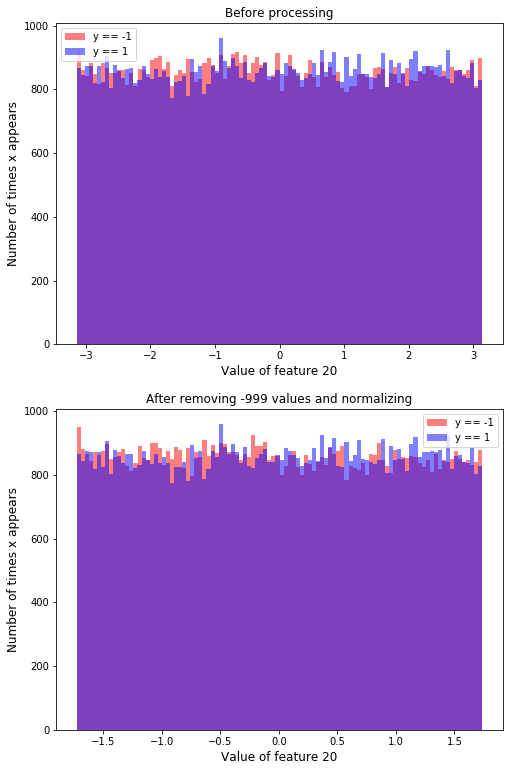

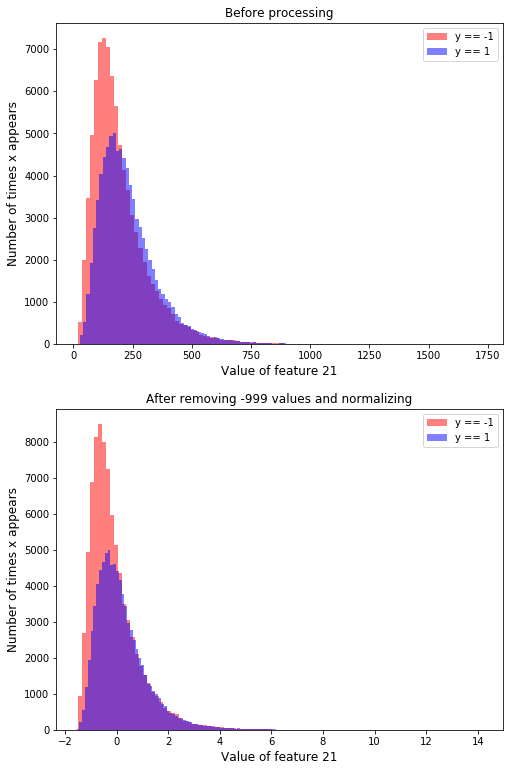

In [ ]:
from matplotlib.colors import to_rgba
for i in range(0,x.shape[1]):
    y00 = x[:, i][y == -1]
    y01 = x[:, i][y == 1]
    
    y10 = sanitized_x[:, i][(y==-1) & (x[:, i] != -999)]
    y11 = sanitized_x[:, i][(y==1) & (x[:, i] != -999)]
    
    sub_y00 = np.random.choice(y00, size=y01.shape[0], replace=False)
    sub_y10 = np.random.choice(y10, size=y11.shape[0], replace=False)
    
    plot_distr(sub_y00, y01, sub_y10, y11, f"graph-features/feature-{i:02d}", i)